# Import

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
# import cv2
from PIL import Image
from tqdm import tqdm

# Data extraction

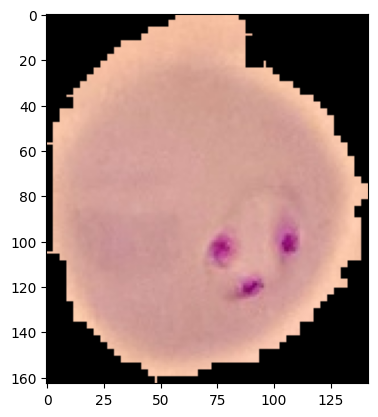

In [134]:
image = Image.open('cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png')
plt.imshow(image)

In [135]:
image_array = np.array(image)
image_array

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [136]:
data = []
label = []
size = 64

for dirname, _, filenames in os.walk('cell_images'):
    for filename in tqdm(filenames):
        if filename.split('.')[1] == 'png':
            image = Image.open(os.path.join(dirname, filename))
            resized_image = image.resize((size, size))
            image_array = np.array(resized_image)

            data.append(image_array)
            label.append(int(dirname.split('/')[1] == 'Parasitized'))

0it [00:00, ?it/s]
100%|██████████| 4133/4133 [00:03<00:00, 1143.90it/s]


# Feature engineering

In [137]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [138]:
data = np.array(data)
#label = pd.Series(label).astype('category')
label = np.array(label)
label

array([1, 1, 1, ..., 0, 0, 0])

In [139]:
xtrain, xtest, ytrain, ytest = train_test_split(data, label, test_size=0.2)

# Model

In [140]:
from tensorflow.keras import models, layers

In [143]:
model = models.Sequential([
    layers.Conv2D(128, (3, 3), activation='relu', input_shape=(size, size, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.5),

    layers.Flatten(),

    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),

    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)              │ (None, 62, 62, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 31, 31, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 31, 31, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 29, 29, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 737,409 (2.81 MB)

 Trainable params: 737,409 (2.81 MB)

 Non-trainable params: 0 (0.00 B)

In [144]:
history = model.fit(xtrain, ytrain, batch_size=64, epochs=10, validation_split=0.1)

Epoch 1/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 36s 175ms/step - accuracy: 0.7032 - loss: 9.5051 - val_accuracy: 0.7645 - val_loss: 0.6645
Epoch 2/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 32s 160ms/step - accuracy: 0.7688 - loss: 0.5245 - val_accuracy: 0.8000 - val_loss: 0.5810
Epoch 3/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 30s 148ms/step - accuracy: 0.7864 - loss: 0.4382 - val_accuracy: 0.9150 - val_loss: 0.2687
Epoch 4/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 29s 145ms/step - accuracy: 0.9165 - loss: 0.2126 - val_accuracy: 0.9415 - val_loss: 0.2012
Epoch 5/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 29s 143ms/step - accuracy: 0.9355 - loss: 0.1708 - val_accuracy: 0.9122 - val_loss: 0.2286
Epoch 6/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 29s 143ms/step - accuracy: 0.9257 - loss: 0.1875 - val_accuracy: 0.9373 - val_loss: 0.1935
Epoch 7/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 29s 143ms/step - accuracy: 0.9408 - loss: 0.1600 - val_accuracy: 0.9282 - val_loss: 0.2135
Epoch 8/10
202/202 ━━━━━━━━━━━━━━━━━━━━ 29s 142ms/step - accuracy: 0.9403 - loss: 0

In [145]:
test_loss, test_acc = model.evaluate(xtest, ytest)
print('Точность на тестовых данных:', test_acc)

113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9298 - loss: 0.2119
Точность на тестовых данных: 0.9303038716316223


In [147]:
model.save('malaria_detecter.keras')